<strong>Haberman’s Survival Data</strong>
Consider Haberman’s Survival Data set to perform various EDA processes on it using Python. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
The various attributes of the data set are:

1. <strong>Age of patient</strong> at the time of operation (numerical)
2. <strong>Patient’s year of operation</strong> (year between 1958 to 1970, numerical)
3. <strong>Number of positive axillary nodes detected</strong> (numerical)
4. <strong>Survival status</strong> (class attribute) denoted as:
    1 — if the patient survived 5 years or longer
    2 — if the patient died within 5 years
    

<strong> Objective </strong>
The main objective of EDA is to determine whether a patient will survive for 5 years or longer based on the attributes Age of Patient, Year of Operation and Positive Axillary Nodes.

# Importing the libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [68]:
df= pd.read_csv('haberman.csv')

# Basic Data Exploration  Central Tendency Measure  6 Point Summary.

In [69]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [70]:
df.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [71]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

### Renaming the columns for better understanding:

In [72]:
df = pd.DataFrame(df)

In [73]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [74]:
df1 = df.rename({'30':'Age of Patient','64':'Year of Operation','1':'Positive Axillary Nodes','1.1':'Survival Status'},axis=1)

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age of Patient           305 non-null    int64
 1   Year of Operation        305 non-null    int64
 2   Positive Axillary Nodes  305 non-null    int64
 3   Survival Status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [76]:
df1.describe() # put comments. mean median mode is always used for numerical analysis. check for mode in categorical data.

,Age of Patient,Year of Operation,Positive Axillary Nodes,Survival Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# EDA
<strong>
The major steps to be covered for EDA are below:

1. Handle Missing value
2. Removing duplicates
3. Outlier Treatment
4. Normalizing and Scaling( Numerical Variables)
5. Encoding Categorical variables( Dummy Variables)
6. Bivariate Analysis

</strong>

<strong>
Step1: Handle Missing value
    from info we understand there are no missing values.
</strong>

<strong>
Step2: Removing duplicates
</strong>

In [77]:
# checking for duplicates.
duplicate_rows_df = df1[df1.duplicated()]

In [78]:
# counting the duplicates
duplicate_rows_df.count()

Age of Patient             17
Year of Operation          17
Positive Axillary Nodes    17
Survival Status            17
dtype: int64

In [79]:
#Removing the duplicate values.
df1 = df1.drop_duplicates()

In [80]:
df1.shape

(288, 4)

<strong>
Step3: Outlier Treatment
</strong>

<strong> Checking for outliers with help of box plot </strong>

In [81]:
df1.columns

Index(['Age of Patient', 'Year of Operation', 'Positive Axillary Nodes',
       'Survival Status'],
      dtype='object')

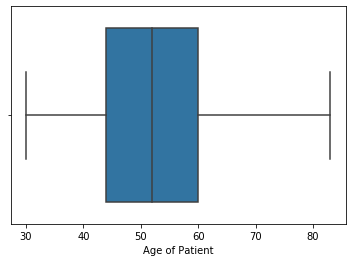

In [82]:
sns.boxplot(x=df1['Age of Patient'])
plt.show()

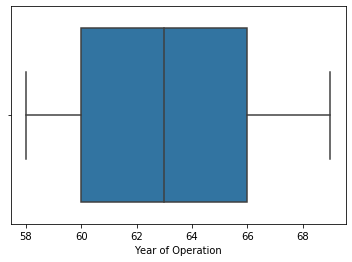

In [83]:
sns.boxplot(x=df1['Year of Operation'])
plt.show()

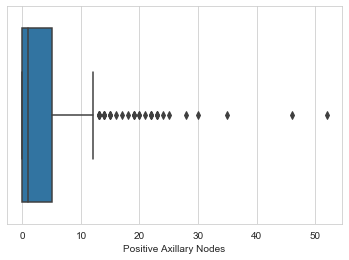

In [89]:
sns.boxplot(x=df1['Positive Axillary Nodes'])
plt.show()

<strong> The column has outliers. Removing the Outliers. </strong>

In [90]:
Q1 = df1.quantile(0.25)
Q3= df1.quantile(0.75)

In [91]:
IQR= Q3-Q1
print(IQR)

Age of Patient             16.0
Year of Operation           6.0
Positive Axillary Nodes     5.0
Survival Status             1.0
dtype: float64


In [92]:
df1.shape

(288, 4)

In [93]:
# Removing the Outliers
df1= df1[~((df1 < (Q1-1.5 * IQR))| (df1 > (Q3 + 1.5 * IQR)))]

In [95]:
print(df1 < (Q1-1.5 * IQR))|(df1 > (Q3 + 1.5 * IQR))

     Age of Patient  Year of Operation  Positive Axillary Nodes  \
0             False              False                    False   
1             False              False                    False   
2             False              False                    False   
3             False              False                    False   
4             False              False                    False   
..              ...                ...                      ...   
300           False              False                    False   
301           False              False                    False   
302           False              False                    False   
303           False              False                    False   
304           False              False                    False   

     Survival Status  
0              False  
1              False  
2              False  
3              False  
4              False  
..               ...  
300            False  
301        

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [96]:
from scipy import stats

In [97]:
z= stats.zscore(df1)

In [98]:
z

array([[-2.08408788, -0.27564405,         nan, -0.61480926],
       [-2.08408788,  0.64034233,         nan, -0.61480926],
       [-1.99146176, -1.19163044,         nan, -0.61480926],
       ...,
       [ 2.26934014,  0.64034233,         nan, -0.61480926],
       [ 2.36196627,  0.64034233,         nan,  1.62652071],
       [ 2.82509691, -1.49695923,         nan,  1.62652071]])

In [104]:
(df1[(z<3)]).shape

(864, 4)

In [94]:
df1.shape

(288, 4)

<strong> Bivariate Analysis-> establish Relation between 2 variables </strong> 

#### Scatter Plot.

C:\Users\ebineet\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'map'

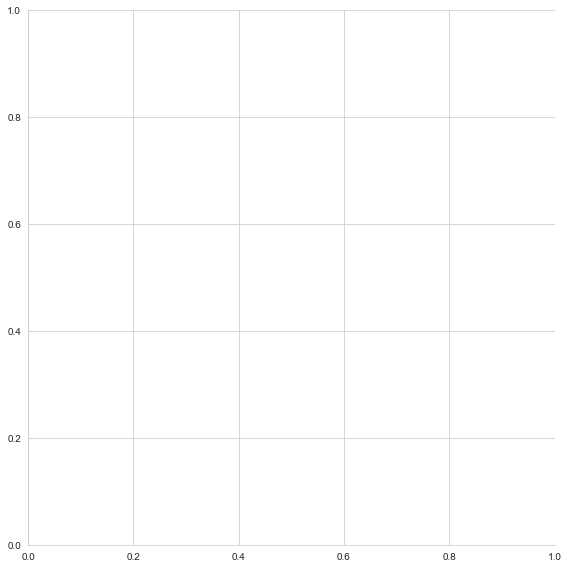

In [87]:
sns.set_style('whitegrid')
sns.FacetGrid(df1, hue ='Survival Status', size = 8)
plt.map()
plt.add_legend()
plt.show()
plt.scatter, 'Age of Patient', 'Positive Axillary Nodes'

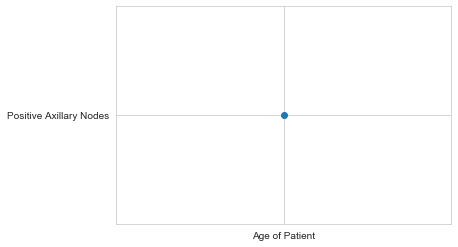

In [88]:
plt.scatter('Age of Patient', 'Positive Axillary Nodes')
plt.show()